# Week 4: Individual Assignment - Isochrones and LA collision hot spots 
This notebook will investigate 3 locations across different areas of LA that have a high proportion of collisions. The 3 locations we have chosen to explore come from investigating [LADOT's Vision Zero/High Injury Network heat map](https://ladotlivablestreets.org/programs/vision-zero/maps), where we zoomed in and chose locations that had multiple collisions. We also wanted to chose locations in different parts of LA, to seek answers to our resaerch question if there are common characterstics of collision hot spots in LA. These three locations differ in their physical location and physical characterstics, surroudning land uses and building typologies, and the types of services that are in their areas. In this notebook, I will explore isochrone maps to understand the surrounding areas of these three hot spot locations, and will begin to analyze common characterstics of these three hot spots. 

### The three locations:
**1. The Valley:** Victory Blvd and Van Nuys Blvd (34.18670122912705, -118.44872393539862)

**2. Downtown LA:** Crocker St and E 4th St (34.04504940058153, -118.24149202214933)

**3. South LA:** Western and 79th (33.96732894334928, -118.30465163691275)


## Import Libraries 

**Step 1**: I am first going to import the libraries I need for this notebook

In [1]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

## Download Street Network  

**Step 1**: First I am going to configure the street network that I need. Because I have the three locations, I am going to use the *graph from point* instead of *graph from place* function as we did in class. This will allow me to plug in my center nodes directly to the functions. 

In [2]:
# configure the place, network type, trip times, and travel speed
center_point_1 = (34.18670122912705, -118.44872393539862) # here I'm making center points for each of the three locations, so that I can refer to them throughout the notebook
center_point_2 = (34.04504940058153, -118.24149202214933)
center_point_3 = (33.96732894334928, -118.30465163691275)
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

In [3]:
G_1 = ox.graph_from_point(center_point_1, network_type=network_type, dist=2000) # Here I'm defining each center point so that in the graph_from_point function my center point is the (lat,lon) of each of my 3 locations, and the distance surrounding those 3 locations is 2000 meters (1.2 miles). 
G_2 = ox.graph_from_point(center_point_2, network_type=network_type, dist=2000)
G_3 = ox.graph_from_point(center_point_3, network_type=network_type, dist=2000)

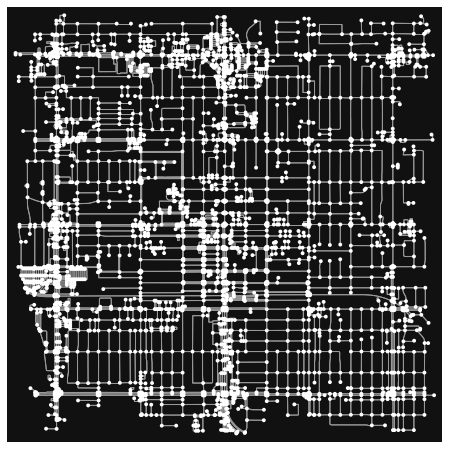

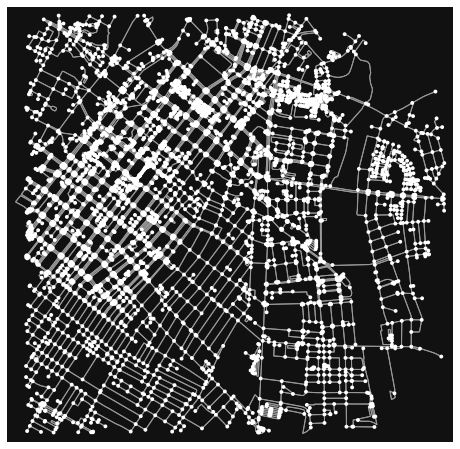

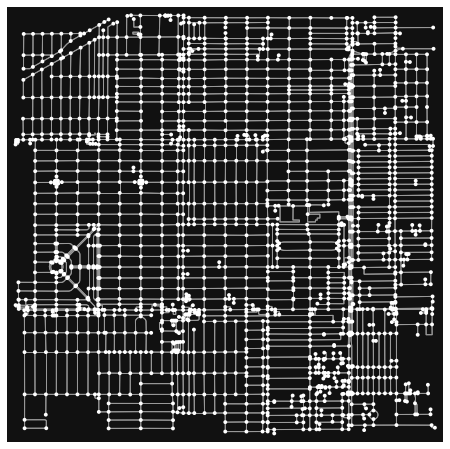

In [4]:
fig, ax = ox.plot_graph(G_1) # Here I'm plotting each of my three locations
fig, ax = ox.plot_graph(G_2)
fig, ax = ox.plot_graph(G_3)

## Project to Web Mercator

**Step 1:** I now need to project the network data to Web Mercator so that we are using a projected coordinate system. 

In [5]:
G_1 = ox.project_graph(G_1, to_crs='epsg:3857') # Again, I'm doing this for all three of my locations
G_2 = ox.project_graph(G_2, to_crs='epsg:3857')
G_3 = ox.project_graph(G_3, to_crs='epsg:3857')

## Convert Edges and Nodes to GDFs

**Step 1:** Here I will convert the graphs to GDFs so that I can explore my data. First I will extract the nodes and edges. 

In [6]:
gdf_nodes_1, gdf_edges_1 = ox.graph_to_gdfs(G_1)

**Step 2:** Now I will sample and plot some of the new GDFs to explore a little more about the nodes and edges of my 3 locations. 

**Step 2a:** Sampling and plotting of Location 1

In [7]:
gdf_nodes_1.head() # Here I'm just sampling the nodes of my G_1 graph to see details

y             x          highway  street_count  \
osmid                                                                   
15299710    4.052916e+06 -1.318565e+07  traffic_signals             4   
7437051872  4.052901e+06 -1.318565e+07              NaN             4   
7437051874  4.052916e+06 -1.318563e+07         crossing             4   
7437051870  4.052916e+06 -1.318568e+07              NaN             4   
6831693613  4.052924e+06 -1.318565e+07              NaN             3   

                   lon        lat                           geometry  
osmid                                                                 
15299710   -118.448728  34.179396  POINT (-13185652.064 4052915.997)  
7437051872 -118.448728  34.179283  POINT (-13185652.097 4052900.859)  
7437051874 -118.448516  34.179397  POINT (-13185628.486 4052916.118)  
7437051870 -118.448960  34.179398  POINT (-13185677.890 4052916.253)  
6831693613 -118.448728  34.179454  POINT (-13185652.097 4052923.883)

In [8]:
gdf_edges_1.head() # Here I'm just sampling the edges of my G_1 graph to see details

osmid  oneway                name    highway  \
u          v          key                                                     
15299710   7437051872 0    402514232   False  Van Nuys Boulevard    primary   
           7437051874 0    402521364   False       Oxnard Street  secondary   
           7437051870 0    517766519   False       Oxnard Street  secondary   
           6831693613 0    729189416   False  Van Nuys Boulevard    primary   
7437051872 15299710   0    402514232   False  Van Nuys Boulevard    primary   

                           length  \
u          v          key           
15299710   7437051872 0    12.509   
           7437051874 0    19.484   
           7437051870 0    21.343   
           6831693613 0     6.516   
7437051872 15299710   0    12.509   

                                                                    geometry  \
u          v          key                                                      
15299710   7437051872 0    LINESTRING (-13185652.064 4052915.997, -131856...   
           7437051874 0    LINESTRING (-13185652.064 4052915.997, -131856...   
           7437051870 0    LINESTRING (-13185652.064 4052915.997, -131856...   
           6831693613 0    LINESTRING (-13185652.064 4052915.997, -131856...   
7437051872 15299710   0    LINESTRING (-13185652.097 4052900.859, -131856...   

                          maxspeed service access lanes bridge tunnel  
u          v          key                                              
15299710   7437051872 0        NaN     NaN    NaN   NaN    NaN    NaN  
           7437051874 0     35 mph     NaN    NaN   NaN    NaN    NaN  
           7437051870 0     35 mph     NaN    NaN   NaN    NaN    NaN  
           6831693613 0        NaN     NaN    NaN   NaN    NaN    NaN  
7437051872 15299710   0        NaN     NaN    NaN   NaN    NaN    NaN

<AxesSubplot:>

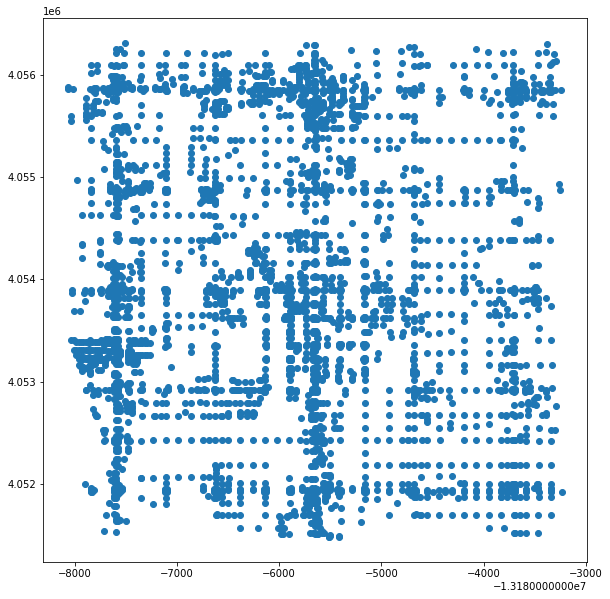

In [9]:
gdf_nodes_1.plot(figsize=(10,10))

<AxesSubplot:>

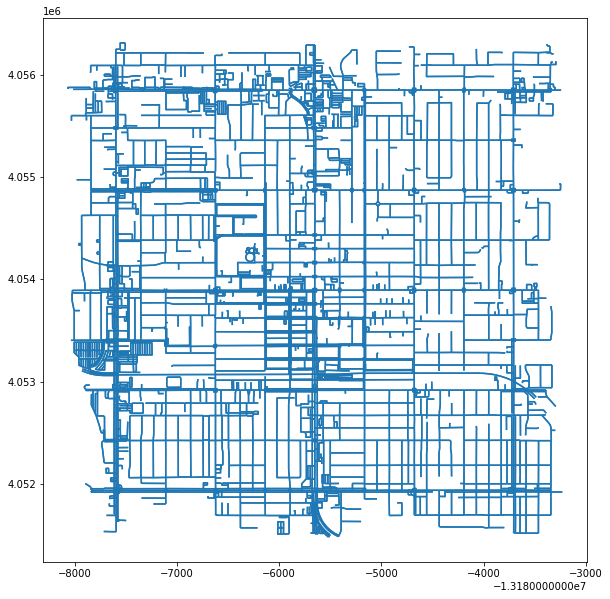

In [10]:
gdf_edges_1.plot(figsize=(10,10))

**Step 2b:** Sampling and plotting of location 2

In [11]:
gdf_nodes_2, gdf_edges_2 = ox.graph_to_gdfs(G_2)

In [12]:
gdf_nodes_2.head()

y             x          highway  street_count  \
osmid                                                                   
16391285    4.033445e+06 -1.316131e+07  traffic_signals             4   
2611809685  4.033429e+06 -1.316131e+07              NaN             3   
122886786   4.033440e+06 -1.316077e+07              NaN             3   
122561083   4.033685e+06 -1.316134e+07              NaN             4   
122886767   4.033447e+06 -1.316144e+07              NaN             4   

                   lon        lat                           geometry  
osmid                                                                 
16391285   -118.230082  34.034573  POINT (-13161312.580 4033445.227)  
2611809685 -118.230066  34.034452  POINT (-13161310.766 4033428.959)  
122886786  -118.225224  34.034531  POINT (-13160771.757 4033439.666)  
122561083  -118.230293  34.036355  POINT (-13161335.991 4033684.700)  
122886767  -118.231210  34.034587  POINT (-13161438.037 4033447.107)

In [13]:
gdf_edges_2.head()

osmid  \
u          v          key                                                      
16391285   2611809685 0                                            186076395   
           122886786  0    [48331376, 167416466, 399279671, 399279674, 39...   
           122561083  0                                            167416480   
           122886767  0                               [399279688, 398812993]   
2611809685 16391285   0                                            186076395   

                               lanes             name    highway maxspeed  \
u          v          key                                                   
16391285   2611809685 0            5  Santa Fe Avenue  secondary   30 mph   
           122886786  0    [6, 4, 5]  East 7th Street    primary      NaN   
           122561083  0            2  Santa Fe Avenue  secondary   30 mph   
           122886767  0       [4, 5]  East 7th Street    primary      NaN   
2611809685 16391285   0            5  Santa Fe Avenue  secondary   30 mph   

                           oneway   length  \
u          v          key                    
16391285   2611809685 0     False   13.549   
           122886786  0     False  447.705   
           122561083  0     False  199.173   
           122886767  0     False  103.861   
2611809685 16391285   0     False   13.549   

                                                                    geometry  \
u          v          key                                                      
16391285   2611809685 0    LINESTRING (-13161312.580 4033445.227, -131613...   
           122886786  0    LINESTRING (-13161312.580 4033445.227, -131612...   
           122561083  0    LINESTRING (-13161312.580 4033445.227, -131613...   
           122886767  0    LINESTRING (-13161312.580 4033445.227, -131613...   
2611809685 16391285   0    LINESTRING (-13161310.766 4033428.959, -131613...   

                          bridge service tunnel access width  
u          v          key                                     
16391285   2611809685 0      NaN     NaN    NaN    NaN   NaN  
           122886786  0      yes     NaN    NaN    NaN   NaN  
           122561083  0      NaN     NaN    NaN    NaN   NaN  
           122886767  0      NaN     NaN    NaN    NaN   NaN  
2611809685 16391285   0      NaN     NaN    NaN    NaN   NaN

<AxesSubplot:>

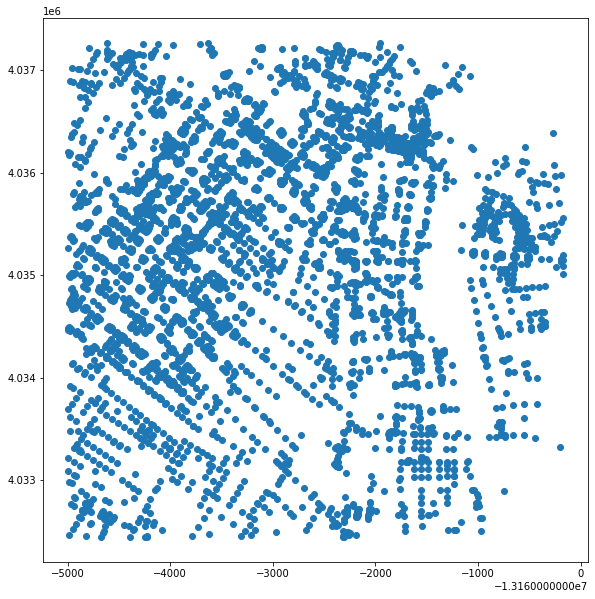

In [14]:
gdf_nodes_2.plot(figsize=(10,10)) 

<AxesSubplot:>

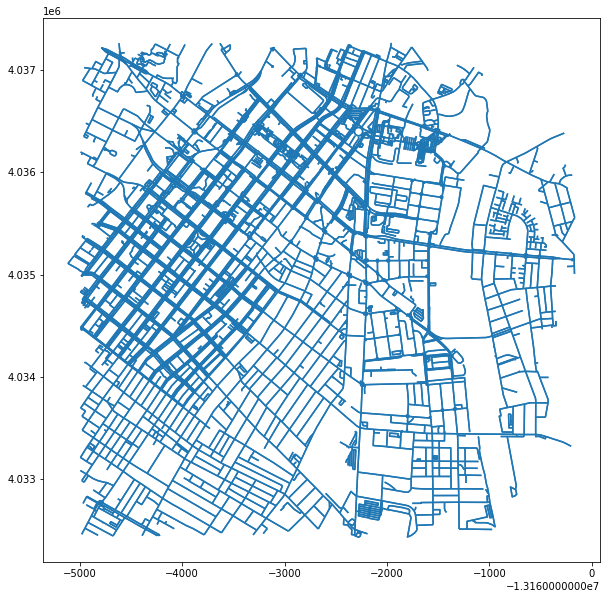

In [15]:
gdf_edges_2.plot(figsize=(10,10)) 

**Step 2c:** Sampling and plotting of location 3

In [16]:
gdf_nodes_3, gdf_edges_3 = ox.graph_to_gdfs(G_3)

In [17]:
gdf_nodes_3.head()

y             x  street_count         lon        lat  \
osmid                                                                         
13642118    4.026374e+06 -1.316803e+07             3 -118.290422  33.981918   
7649738599  4.026374e+06 -1.316803e+07             3 -118.290388  33.981915   
123152393   4.026373e+06 -1.316815e+07             3 -118.291516  33.981907   
21098536    4.026413e+06 -1.316815e+07             4 -118.291497  33.982202   
13642119    4.026375e+06 -1.316775e+07             3 -118.287913  33.981924   

                    highway                           geometry  
osmid                                                           
13642118                NaN  POINT (-13168029.587 4026374.247)  
7649738599              NaN  POINT (-13168025.713 4026373.965)  
123152393               NaN  POINT (-13168151.360 4026372.783)  
21098536    traffic_signals  POINT (-13168149.200 4026412.507)  
13642119                NaN  POINT (-13167750.231 4026375.133)

In [18]:
gdf_edges_3.head()

osmid   lanes              name  \
u          v          key                                                     
13642118   7649738599 0                 165899879       4  West Gage Avenue   
           123152393  0     [13455953, 165899805]     NaN               NaN   
           21098536   0    [399295618, 165899879]  [4, 5]  West Gage Avenue   
7649738599 6765929602 0                 165899879       4  West Gage Avenue   
           13642118   0                 165899879       4  West Gage Avenue   

                                highway  oneway   length  \
u          v          key                                  
13642118   7649738599 0       secondary   False    3.217   
           123152393  0    primary_link   False  100.893   
           21098536   0       secondary   False  104.133   
7649738599 6765929602 0       secondary   False   12.399   
           13642118   0       secondary   False    3.217   

                                                                    geometry  \
u          v          key                                                      
13642118   7649738599 0    LINESTRING (-13168029.587 4026374.247, -131680...   
           123152393  0    LINESTRING (-13168029.587 4026374.247, -131680...   
           21098536   0    LINESTRING (-13168029.587 4026374.247, -131680...   
7649738599 6765929602 0    LINESTRING (-13168025.713 4026373.965, -131680...   
           13642118   0    LINESTRING (-13168025.713 4026373.965, -131680...   

                          service access maxspeed tunnel junction  
u          v          key                                          
13642118   7649738599 0       NaN    NaN      NaN    NaN      NaN  
           123152393  0       NaN    NaN      NaN    NaN      NaN  
           21098536   0       NaN    NaN      NaN    NaN      NaN  
7649738599 6765929602 0       NaN    NaN      NaN    NaN      NaN  
           13642118   0       NaN    NaN      NaN    NaN      NaN

<AxesSubplot:>

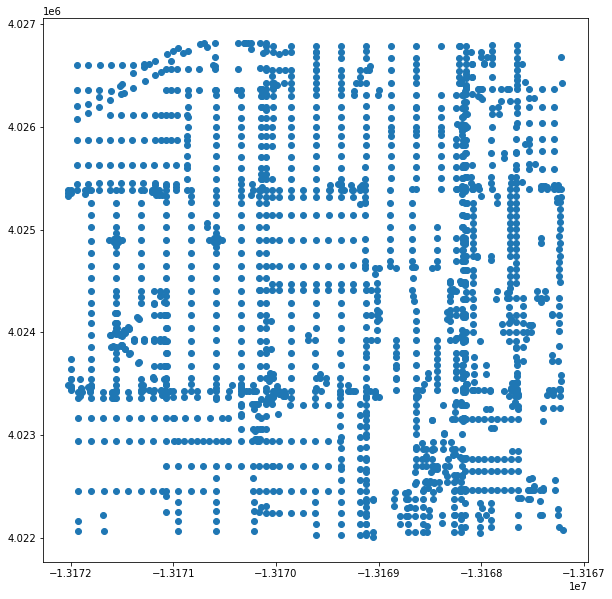

In [19]:
gdf_nodes_3.plot(figsize=(10,10))

<AxesSubplot:>

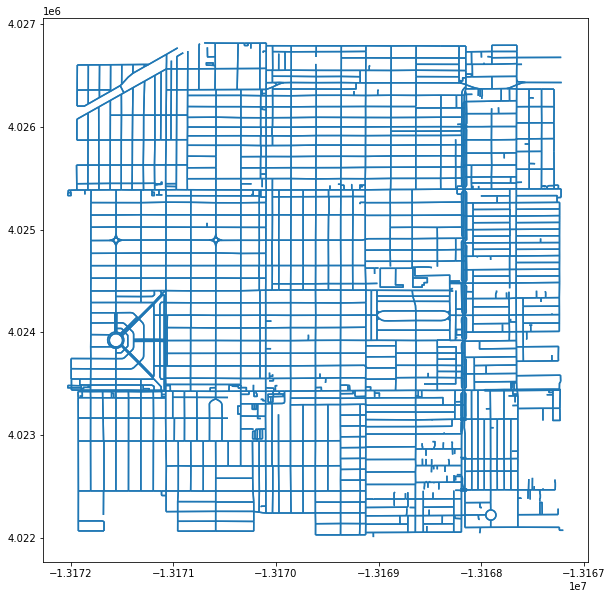

In [20]:
gdf_edges_3.plot(figsize=(10,10))

## Analyzing Network Properties

**Step 1:** I now want to take a look at the 'highway' features of my 3 graphs. This will allow me to compare the three locations, and see if they have similar characterstics in terms of road types near where collissions took place. 

In [21]:
gdf_edges_1['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


service                    3596
residential                2278
footway                    2214
primary                    1222
secondary                   578
tertiary                    460
busway                       42
pedestrian                   34
primary_link                 14
[residential, service]       10
unclassified                 10
track                         6
[tertiary, residential]       4
[unclassified, service]       2
[primary_link, primary]       2
[path, service]               2
Name: highway, dtype: int64

In [22]:
gdf_edges_2['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


footway                          5552
service                          2840
primary                          2096
secondary                        1638
residential                      1176
tertiary                          420
unclassified                      268
[footway, steps]                  218
primary_link                       98
steps                              64
pedestrian                         36
path                               24
[residential, service]             14
[primary, secondary]               14
secondary_link                      6
[unclassified, residential]         4
[pedestrian, service]               4
[unclassified, service]             4
[footway, pedestrian]               4
[footway, service]                  4
[primary, residential]              2
[pedestrian, path]                  2
[steps, residential]                2
[footway, steps, residential]       2
[primary, tertiary]                 2
[footway, corridor]                 2
[footway, un

In [23]:
gdf_edges_3['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


residential               2876
service                   1236
tertiary                   882
primary                    642
secondary                  160
footway                    142
primary_link                 6
secondary_link               6
[residential, service]       6
tertiary_link                4
Name: highway, dtype: int64

**Analysis**: Let's compare the three different locations and their top 3 highway types.
* Location 1 - The Valley: Primarily 'service', 'residential', and 'footways' highway types
* Location 2 - DTLA: Primarily 'footway', 'service', and 'primary' highway types
* Location 3 - South LA: Primarily 'residential', 'service', and 'tertiary' highway types

As we can see, these **three locations all share similar characterstics of 'service' highway types, and two out of the three locations also share 'residential' highway types**. It will be interesting to look into this aspect of shared 'highway' types later on in this project. 

**Step 2:** I now want to take a look at the basic street network measures so that we can compare and contrast the three locations.

In [24]:
stats = ox.basic_stats(G_1, circuity_dist='euclidean') # stats for location 1
stats

/opt/conda/lib/python3.9/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 3458,
 'm': 10474,
 'k_avg': 6.0578368999421635,
 'edge_length_total': 636030.5559999988,
 'edge_length_avg': 60.72470460187119,
 'streets_per_node_avg': 3.0624638519375362,
 'streets_per_node_counts': {0: 0, 1: 473, 2: 0, 3: 1825, 4: 1158, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13678426836321572,
  2: 0.0,
  3: 0.5277617119722383,
  4: 0.33487565066512437,
  5: 0.000578368999421631},
 'intersection_count': 2985,
 'street_length_total': 318015.27800000017,
 'street_segment_count': 5237,
 'street_length_avg': 60.72470460187133,
 'circuity_avg': 0.8778509862883528,
 'self_loop_proportion': 0.0032461332824135956}

In [25]:
stats = ox.basic_stats(G_2, circuity_dist='euclidean') # stats for location 2
stats

{'n': 4788,
 'm': 14502,
 'k_avg': 6.057644110275689,
 'edge_length_total': 729968.7380000063,
 'edge_length_avg': 50.33572872707256,
 'streets_per_node_avg': 3.06265664160401,
 'streets_per_node_counts': {0: 0,
  1: 813,
  2: 2,
  3: 2077,
  4: 1867,
  5: 26,
  6: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.16979949874686717,
  2: 0.0004177109440267335,
  3: 0.43379281537176273,
  4: 0.38993316624895574,
  5: 0.005430242272347535,
  6: 0.0006265664160401002},
 'intersection_count': 3975,
 'street_length_total': 364984.369,
 'street_segment_count': 7251,
 'street_length_avg': 50.33572872707213,
 'circuity_avg': 0.8689445985077584,
 'self_loop_proportion': 0.0028961522548613984}

In [26]:
stats = ox.basic_stats(G_3, circuity_dist='euclidean' )# stats for location 3
stats

{'n': 1869,
 'm': 5960,
 'k_avg': 6.377742108079187,
 'edge_length_total': 568649.4400000018,
 'edge_length_avg': 95.41097986577212,
 'streets_per_node_avg': 3.2573568753344033,
 'streets_per_node_counts': {0: 0, 1: 172, 2: 0, 3: 878, 4: 813, 5: 6},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.09202782236490102,
  2: 0.0,
  3: 0.46976993044408777,
  4: 0.434991974317817,
  5: 0.0032102728731942215},
 'intersection_count': 1697,
 'street_length_total': 284324.71999999945,
 'street_segment_count': 2980,
 'street_length_avg': 95.41097986577162,
 'circuity_avg': 0.8414421899110746,
 'self_loop_proportion': 0.0013422818791946308}

**Analysis:** I'm now going to compare the three different locations and some of their states

* Location 1 - The Valley:
    * intersection count: 2985
    * average street length: 60.725 meters(I think)
* Location 2 - DTLA:
    * intersection count: 3975
    * average street length: 50.335 meters(I think)
* Location 3 - South LA:
    * intersection count: 1697
    * average street length: 95.411 meters(I think)
    
I'm not actually sure if this is showing anything significant. I think I would need to do some more research into what these states mean to understand if they can tell us anything about why there are so many collisions in these locations. 

## The Centroid

**Step 1:** I will now generate the node nearest to the centroid for each of my three graphs. First, I will define the centroid for each location.

**Step 1a:** First I need to define the centroid for Location 1

In [27]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes_1.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13188068.743160496
4051480.638032336
-13183231.52166731
4056313.550552489


In [28]:
centroid_x_1 = (maxx-minx)/2 + minx
centroid_y_1 = (maxy-miny)/2 + miny
print(centroid_x_1)
print(centroid_y_1)

-13185650.132413901
4053897.0942924125


**Step 2b**: Now I need to get the centroid for Location 2

In [29]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes_2.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13164998.13491596
4032446.9280685643
-13160166.612980703
4037263.6134010176


In [30]:
centroid_x_2 = (maxx-minx)/2 + minx
centroid_y_2 = (maxy-miny)/2 + miny
print(centroid_x_2)
print(centroid_y_2)

-13162582.373948332
4034855.2707347907


**Step 2c:** Now I need to get the centroid for Location 3

In [31]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes_3.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13172027.571141338
4022006.255526823
-13167200.78028444
4026819.794166981


In [32]:
centroid_x_3 = (maxx-minx)/2 + minx
centroid_y_3 = (maxy-miny)/2 + miny
print(centroid_x_3)
print(centroid_y_3)

-13169614.175712889
4024413.024846902


**Step 3:** Getting the node nearest the centroid for each location

**Step 3a:** Here I'm getting the ID for the node nearest the centroid for Location 1

In [33]:
center_node_1 = ox.distance.nearest_nodes(G_1,Y=centroid_y_1,X=centroid_x_1)
print('The id for the nearest node for location 1 is ' + str(center_node_1))

The id for the nearest node for location 1 is 122993081


**Step 3b:** Here I'm getting the ID for the node nearest the centroid for Location 2

In [34]:
center_node_2 = ox.distance.nearest_nodes(G_2,Y=centroid_y_2,X=centroid_x_2)
print('The id for the nearest node for location 2 is ' + str(center_node_2))

The id for the nearest node for location 2 is 122620342


**Step 3c**: Now I'm getting the ID for the node nearest the centroid for Location 3

In [35]:
center_node_3 = ox.distance.nearest_nodes(G_3,Y=centroid_y_3,X=centroid_x_3)
print('The id for the nearest node for location 3 is ' + str(center_node_3))

The id for the nearest node for location 3 is 123128254


**Step 4**: Getting the record `loc` for each graph

**Step 4a:** Getting the `loc` for graph 1

In [36]:
gdf_nodes_1.loc[[center_node_1]]

y             x          highway  street_count  \
osmid                                                                  
122993081  4.053895e+06 -1.318565e+07  traffic_signals             4   

                 lon        lat                           geometry  
osmid                                                               
122993081 -118.44873  34.186671  POINT (-13185652.320 4053895.061)

**Step 4b:** Getting the `loc` for graph 2

In [37]:
gdf_nodes_2.loc[[center_node_2]]

y             x highway  street_count         lon  \
osmid                                                                     
122620342  4.034833e+06 -1.316258e+07     NaN             4 -118.241512   

                 lat                           geometry  
osmid                                                    
122620342  34.044906  POINT (-13162584.962 4034833.373)

**Step 4c:** Getting the `loc` for graph 3

In [38]:
gdf_nodes_3.loc[[center_node_3]]

y             x  street_count         lon        lat  \
osmid                                                                        
123128254  4.024413e+06 -1.316961e+07             4 -118.304655  33.967306   

                   highway                           geometry  
osmid                                                          
123128254  traffic_signals  POINT (-13169613.964 4024412.825)

## Mapping 

**Step 1:** Now I am going to map each graph, their nodes, and will differentiate the node nearest the center in red. 

**Step 1a:** Mapping for graph 1

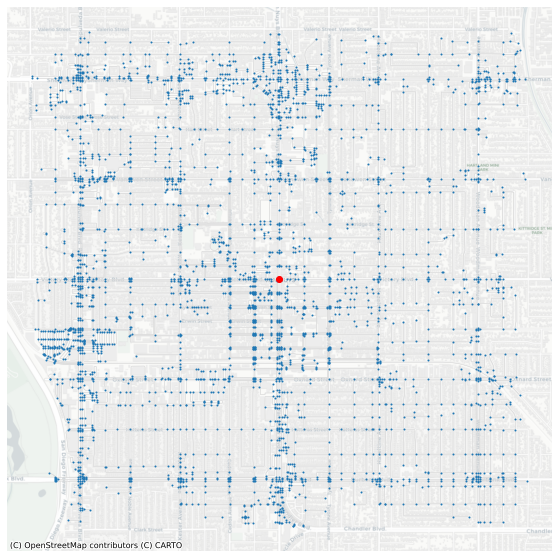

In [39]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges_1.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdf_nodes_1.plot(ax=ax, 
               markersize=1, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes_1.loc[[center_node_1]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)   #higher number is drawn on top (0 would mean the red dot is below the other node dots)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

**Step 1b:** Mapping for graph 2

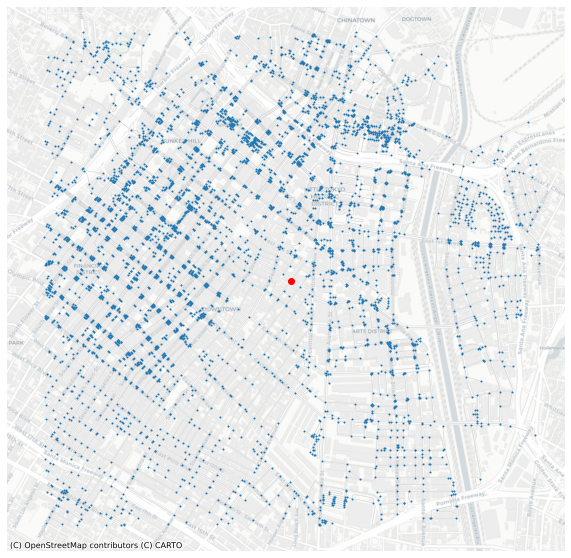

In [40]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges_2.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdf_nodes_2.plot(ax=ax, 
               markersize=1, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes_2.loc[[center_node_2]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)   #higher number is drawn on top (0 would mean the red dot is below the other node dots)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

**Step 1c:** Mapping for graph 3

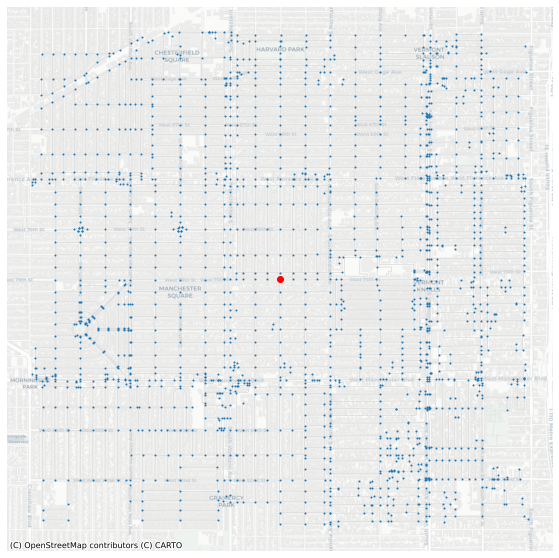

In [41]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges_3.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdf_nodes_3.plot(ax=ax, 
               markersize=1, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes_3.loc[[center_node_3]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)   #higher number is drawn on top (0 would mean the red dot is below the other node dots)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Isochrones

**Step 1:** I am now going to make isocrhones for each map. First I need to create 'walk time' columns for each graph. 

**Step 1a:** Creating 'walk time' and then spot checking data for graph 1

In [42]:
gdf_edges_1['walk_time'] = gdf_edges_1['length']/meters_per_minute

In [43]:
gdf_edges_1[['osmid','name','highway','length','walk_time']].sample(3)

osmid name  highway  length  walk_time
u          v          key                                            
4818881393 6379977963 0    489665494  NaN  service  14.485   0.193133
7663343812 7663343811 0    820879306  NaN  service  14.171   0.188947
6594086016 2591454115 0    253174640  NaN  service  48.925   0.652333

**Step 1b:** Creating 'walk time' and then spot checking data for graph 2

In [44]:
gdf_edges_2['walk_time'] = gdf_edges_2['length']/meters_per_minute

In [45]:
gdf_edges_2[['osmid','name','highway','length','walk_time']].sample(3)

osmid             name  highway  length  \
u          v          key                                                
6819317161 8657339852 0    727675078              NaN  service   5.813   
4073891613 8873450817 0    773744394              NaN  service   9.622   
3665224334 69238346   0    382241130  West 6th Street  primary  10.537   

                           walk_time  
u          v          key             
6819317161 8657339852 0     0.077507  
4073891613 8873450817 0     0.128293  
3665224334 69238346   0     0.140493

**Step 1c:** Creating 'walk time' and then spot checking data for graph 3

In [46]:
gdf_edges_3['walk_time'] = gdf_edges_3['length']/meters_per_minute

In [47]:
gdf_edges_3[['osmid','name','highway','length','walk_time']].sample(3)

osmid                  name      highway  \
u          v          key                                                 
2555201385 2555199455 0    965547983                   NaN      service   
1727357384 1727357385 0    160699487  South Vermont Avenue  residential   
123128259  2555199473 0     13375016      West 79th Street     tertiary   

                            length  walk_time  
u          v          key                      
2555201385 2555199455 0     16.568   0.220907  
1727357384 1727357385 0    109.161   1.455480  
123128259  2555199473 0     52.985   0.706467

**Step 2:** Colors! I am now going to pick colors for my 4 trips times (5, 10, 15, 20 minutes walking times) 

**Step 2a:** I am now going to assign hex codes for each trip isochrone 

In [48]:
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [49]:
# I'm reversing the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [50]:
# I'm now "zipping" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

In [51]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


**Step 2b:** Now I need to color each node based on travel time from the center node of each of my 3 maps

**Step 2b.1:** Color coding for map 1

In [52]:
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G_1, center_node_1, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes_1.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes_1.loc[node,'color'] = color

There are 1110 nodes within 20 minutes 
There are 622 nodes within 15 minutes 
There are 264 nodes within 10 minutes 
There are 56 nodes within 5 minutes 


**Step 2b.2:** Color coding for map 2

In [53]:
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G_2, center_node_2, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes_2.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes_2.loc[node,'color'] = color

There are 1762 nodes within 20 minutes 
There are 892 nodes within 15 minutes 
There are 365 nodes within 10 minutes 
There are 81 nodes within 5 minutes 


**Step 2b.3:** Color coding for map 3

In [54]:
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G_3, center_node_3, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes_3.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes_3.loc[node,'color'] = color

There are 1260 nodes within 20 minutes 
There are 719 nodes within 15 minutes 
There are 284 nodes within 10 minutes 
There are 63 nodes within 5 minutes 


**Step 3:** Replacing null values with a neutral color 

**Step 3a:** For map 1

In [55]:
gdf_nodes_1['color'].fillna('#cccccc', inplace=True)

**Step 3b:** For map 2

In [56]:
gdf_nodes_2['color'].fillna('#cccccc', inplace=True)

**Step 3c:** For map 3 

In [57]:
gdf_nodes_3['color'].fillna('#cccccc', inplace=True)

**Step 3d:** spot checking that the null values have been assigned the new neutral color

In [58]:
gdf_nodes_1.sample(3)

y             x   highway  street_count         lon  \
osmid                                                                        
7311044089  4.053222e+06 -1.318567e+07  crossing             4 -118.448885   
6379942981  4.051918e+06 -1.318760e+07       NaN             4 -118.466183   
122727945   4.052426e+06 -1.318638e+07      stop             4 -118.455272   

                  lat                           geometry     time    color  
osmid                                                                       
7311044089  34.181668  POINT (-13185669.563 4053221.817)  20 mins  #0d0887  
6379942981  34.171976  POINT (-13187595.168 4051917.603)      NaN  #cccccc  
122727945   34.175751  POINT (-13186380.605 4052425.562)      NaN  #cccccc

In [59]:
gdf_nodes_2.sample(3)

y             x highway  street_count         lon  \
osmid                                                                      
7672084071  4.035854e+06 -1.316259e+07     NaN             4 -118.241574   
8660286200  4.036652e+06 -1.316370e+07     NaN             3 -118.251519   
7823193722  4.037162e+06 -1.316461e+07     NaN             3 -118.259722   

                  lat                           geometry     time    color  
osmid                                                                       
7672084071  34.052499  POINT (-13162591.775 4035853.539)  20 mins  #0d0887  
8660286200  34.058444  POINT (-13163698.858 4036652.316)      NaN  #cccccc  
7823193722  34.062241  POINT (-13164612.090 4037162.483)      NaN  #cccccc

In [60]:
gdf_nodes_3.sample(3)

y             x  street_count         lon        lat  \
osmid                                                                         
6280760317  4.023862e+06 -1.317161e+07             4 -118.322568  33.963202   
5572555314  4.023057e+06 -1.317018e+07             3 -118.309739  33.957204   
320851030   4.024134e+06 -1.316833e+07             3 -118.293119  33.965229   

           highway                           geometry     time    color  
osmid                                                                    
6280760317     NaN  POINT (-13171608.064 4023862.023)  20 mins  #0d0887  
5572555314     NaN  POINT (-13170179.901 4023057.002)  20 mins  #0d0887  
320851030      NaN  POINT (-13168329.749 4024134.139)  10 mins  #ed7953

## Mapping the Isochrones

**Step 1:** Now I will map the isocrhones for each map

**Step 1a:** Map 1

<AxesSubplot:>

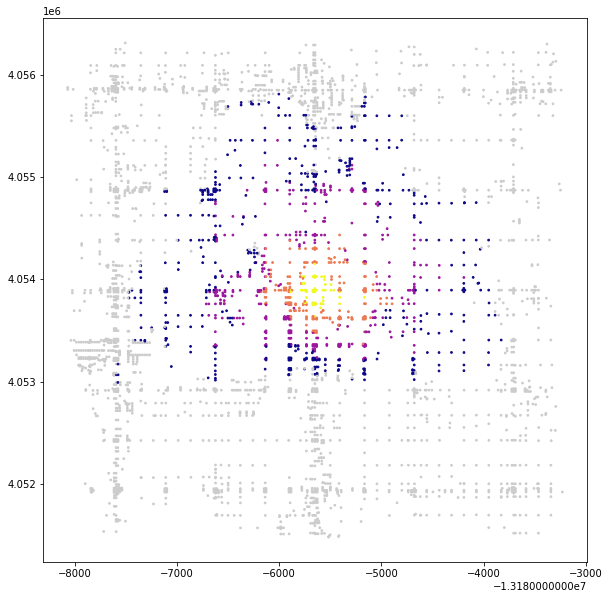

In [61]:
gdf_nodes_1.plot(figsize=(10,10),
               color=gdf_nodes_1['color'],
               markersize=3)

**Step 1b:** Map 2

<AxesSubplot:>

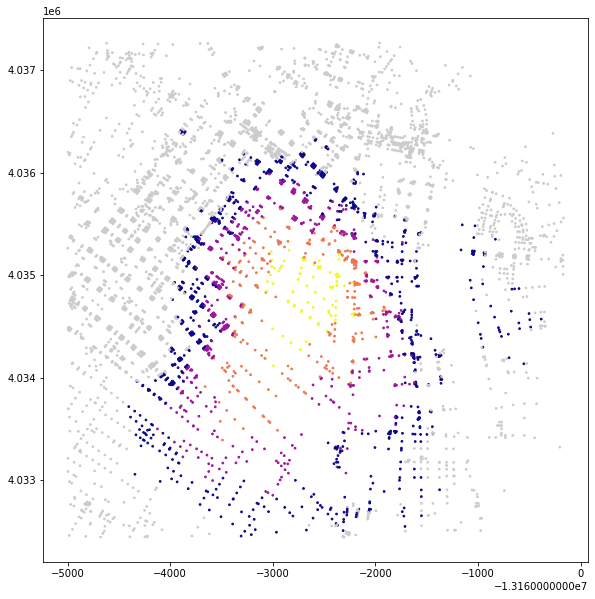

In [62]:
gdf_nodes_2.plot(figsize=(10,10),
               color=gdf_nodes_2['color'],
               markersize=3)

**Step 1c:** Map 3

<AxesSubplot:>

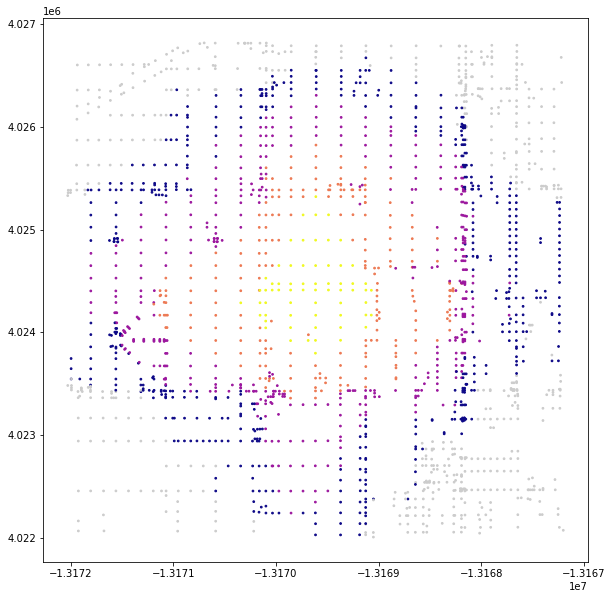

In [63]:
gdf_nodes_3.plot(figsize=(10,10),
               color=gdf_nodes_3['color'],
               markersize=3)

**Step 2:** Now to make the isocrhone map even better, I will create polygons for each time capture area 

**Step 2a:** Polygons for map 1

In [64]:
isochrones_1 = gdf_nodes_1.dissolve("time") # here I'm dissolving the nodes by time, meaning that I am collapsing/grouping the data by time category 
isochrones_1

geometry             y  \
time                                                                       
10 mins  MULTIPOINT (-13186537.466 4053770.851, -131861...  4.053763e+06   
15 mins  MULTIPOINT (-13186713.328 4053760.826, -131866...  4.054742e+06   
20 mins  MULTIPOINT (-13187594.912 4053067.661, -131875...  4.055290e+06   
5 mins   MULTIPOINT (-13185895.653 4053878.603, -131858...  4.053826e+06   

                    x highway  street_count         lon        lat    color  
time                                                                         
10 mins -1.318517e+07    stop             4 -118.444365  34.185689  #ed7953  
15 mins -1.318565e+07    stop             3 -118.448725  34.192962  #9c179e  
20 mins -1.318493e+07    stop             3 -118.442198  34.197035  #0d0887  
5 mins  -1.318517e+07    stop             3 -118.444363  34.186159  #f0f921

In [65]:
isochrones_1 = isochrones_1.convex_hull.reset_index() # Here I am creating the convex hull polygon that will encompass all of the nodes within each time category 
isochrones_1

time                                                  0
0  10 mins  POLYGON ((-13185179.412 4053369.731, -13185733...
1  15 mins  POLYGON ((-13185166.466 4053214.281, -13186138...
2  20 mins  POLYGON ((-13187577.991 4052992.912, -13187594...
3   5 mins  POLYGON ((-13185651.908 4053636.887, -13185885...

In [66]:
isochrones_1.columns=['time','geometry'] # Here I am renaming the above column '0' to read 'Geometry'

In [67]:
isochrones_1.head()

time                                           geometry
0  10 mins  POLYGON ((-13185179.412 4053369.731, -13185733...
1  15 mins  POLYGON ((-13185166.466 4053214.281, -13186138...
2  20 mins  POLYGON ((-13187577.991 4052992.912, -13187594...
3   5 mins  POLYGON ((-13185651.908 4053636.887, -13185885...

<AxesSubplot:>

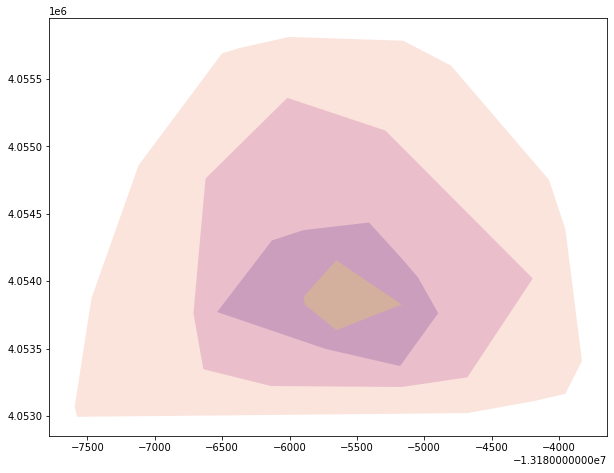

In [68]:
isochrones_1.plot(figsize=(10,10),alpha=0.2,cmap='plasma') # Here I am plotting each polygon for the 4 time categories 

**Step 2b:** Polygons for map 2

In [69]:
isochrones_2 = gdf_nodes_2.dissolve("time") 
isochrones_2

geometry             y  \
time                                                                       
10 mins  MULTIPOINT (-13163659.318 4033914.022, -131635...  4.035071e+06   
15 mins  MULTIPOINT (-13164124.299 4033501.337, -131640...  4.035816e+06   
20 mins  MULTIPOINT (-13164403.155 4033718.471, -131643...  4.036100e+06   
5 mins   MULTIPOINT (-13163069.235 4034183.167, -131630...  4.034996e+06   

                    x          highway  street_count         lon        lat  \
time                                                                          
10 mins -1.316337e+07  traffic_signals             4 -118.248540  34.046674   
15 mins -1.316279e+07  traffic_signals             4 -118.243397  34.052220   
20 mins -1.316315e+07  traffic_signals             4 -118.246608  34.054333   
5 mins  -1.316237e+07  traffic_signals             4 -118.239591  34.046116   

           color  
time              
10 mins  #ed7953  
15 mins  #9c179e  
20 mins  #0d0887  
5 mins   #f0f921

In [70]:
isochrones_2 = isochrones_2.convex_hull.reset_index()

In [71]:
isochrones_2.columns=['time','geometry'] 

In [72]:
isochrones_2.head()

time                                           geometry
0  10 mins  POLYGON ((-13163489.823 4033392.825, -13163659...
1  15 mins  POLYGON ((-13162999.505 4032855.049, -13163586...
2  20 mins  POLYGON ((-13163308.261 4032457.150, -13164343...
3   5 mins  POLYGON ((-13162992.714 4034115.823, -13163069...

<AxesSubplot:>

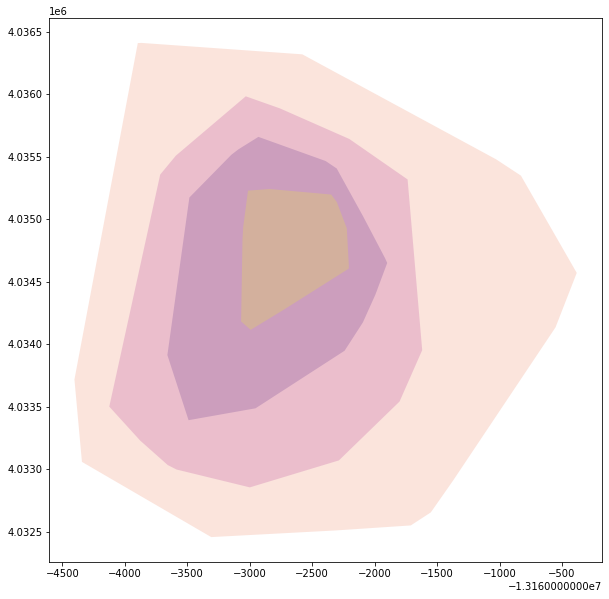

In [73]:
isochrones_2.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

**Step 2c:** Polygons for map 3

In [74]:
isochrones_3 = gdf_nodes_3.dissolve("time")  
isochrones_3

geometry             y  \
time                                                                       
10 mins  MULTIPOINT (-13171189.135 4024275.286, -131711...  4.023468e+06   
15 mins  MULTIPOINT (-13171802.928 4024403.765, -131718...  4.023434e+06   
20 mins  MULTIPOINT (-13171994.843 4023745.604, -131719...  4.025714e+06   
5 mins   MULTIPOINT (-13170342.205 4024288.038, -131701...  4.025145e+06   

                    x  street_count         lon        lat          highway  \
time                                                                          
10 mins -1.316913e+07             3 -118.300270  33.960267             stop   
15 mins -1.316913e+07             4 -118.300271  33.960012  traffic_signals   
20 mins -1.317058e+07             3 -118.313367  33.977002  traffic_signals   
5 mins  -1.316949e+07             4 -118.303515  33.972763  traffic_signals   

           color  
time              
10 mins  #ed7953  
15 mins  #9c179e  
20 mins  #0d0887  
5 mins   #f0f921

In [75]:
isochrones_3 = isochrones_3.convex_hull.reset_index() 
isochrones_3

time                                                  0
0  10 mins  POLYGON ((-13169857.320 4023359.551, -13170099...
1  15 mins  POLYGON ((-13169852.355 4022240.376, -13171473...
2  20 mins  POLYGON ((-13169370.219 4022027.405, -13169613...
3   5 mins  POLYGON ((-13169614.821 4023797.411, -13169856...

In [76]:
isochrones_3.columns=['time','geometry']

In [77]:
isochrones_3.head()

time                                           geometry
0  10 mins  POLYGON ((-13169857.320 4023359.551, -13170099...
1  15 mins  POLYGON ((-13169852.355 4022240.376, -13171473...
2  20 mins  POLYGON ((-13169370.219 4022027.405, -13169613...
3   5 mins  POLYGON ((-13169614.821 4023797.411, -13169856...

<AxesSubplot:>

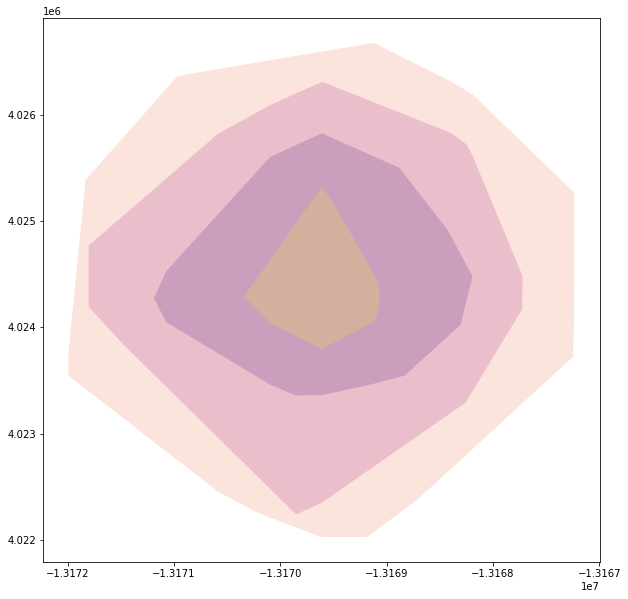

In [78]:
isochrones_3.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

## All together now!

I am now going to add subplots, the center node, a legend, a map title,all edges and node, and the isochrone polygons to make final maps of each of my 3 locations.

## **Map 1:** The Valley

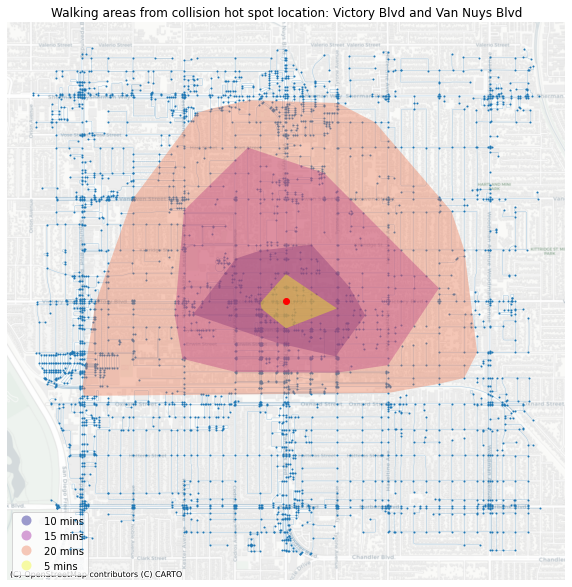

In [79]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones_1.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes_1.loc[[center_node_1]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes_1.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges_1.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from collision hot spot location:' + ' Victory Blvd and Van Nuys Blvd')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## **Map 2:** Downtown LA

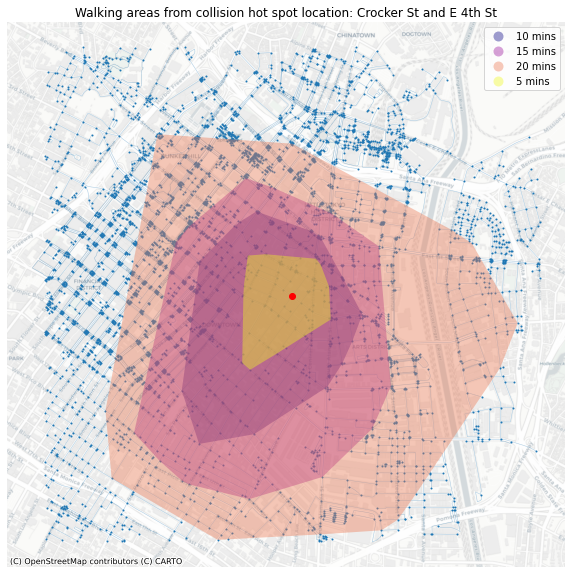

In [80]:
fig, ax = plt.subplots(figsize=(10,15))

isochrones_2.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

gdf_nodes_2.loc[[center_node_2]].plot(ax=ax,color='r', zorder=30)

gdf_nodes_2.plot(ax=ax, 
               markersize=1, 
               zorder=10)

gdf_edges_2.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

ax.axis('off')

ax.set_title('Walking areas from collision hot spot location:' + ' Crocker St and E 4th St')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## **Map 3:** South LA

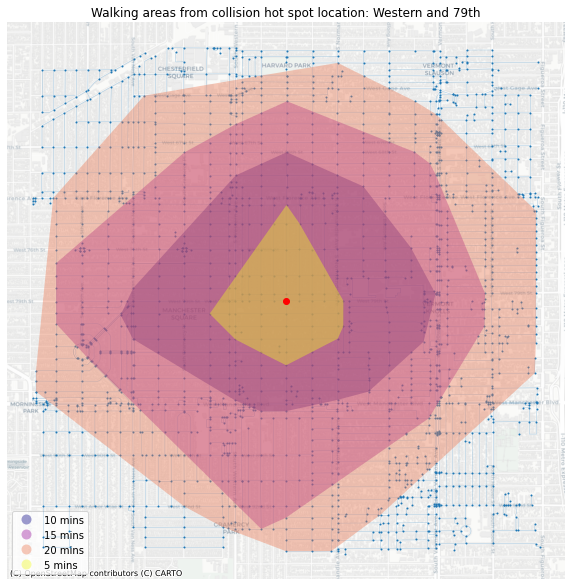

In [83]:
fig, ax = plt.subplots(figsize=(10,15))

isochrones_3.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

gdf_nodes_3.loc[[center_node_3]].plot(ax=ax,color='r', zorder=30)

gdf_nodes_3.plot(ax=ax, 
               markersize=1, 
               zorder=10)

gdf_edges_3.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

ax.axis('off')

ax.set_title('Walking areas from collision hot spot location:' + ' Western and 79th')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Analysis & Next Steps

**1.** The next steps in this analysis would be to look more closely at the aspects of these 3 locations, including physical and built environment characterstics, as well as land uses in each of the time categories. Are there similar characterstics that each of these three locations have, especially are there similar characterstics in the time groupings. For example, how do the speed limits change as people get closer to the center node, are there stop signs or signals, etc. 

**2.** Another next step would be to repeat this whole notebook using both *drive* and *bike* 'network_types' to understand if there is any difference between/anything significant about walking, biking, and driving in these areas that would lead to collissions. 

**3.** Compare these isochrone maps to Danielle's exploration from this week, where we can maybe understand more about how people use these spaces given the different building typolgies